<a href="https://colab.research.google.com/github/hkbu-kennycheng/comp7015/blob/main/comp7015_lab3_Deep_learning_with_PyTorch_(Part_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning with PyTorch (Part 1)

---

In [ ]:
import torch

# Multi layer perceptron

## Dataset: Fashion MNIST

Let's take a look to the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist#fashion-mnist) dataset.

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9naXRodWIuY29tL3phbGFuZG9yZXNlYXJjaC9mYXNoaW9uLW1uaXN0I2Zhc2hpb24tbW5pc3Q=)

In [ ]:
from torchvision import datasets
from torchvision import transforms

train_set = datasets.FashionMNIST("./data", download=True, transform=transforms.Compose([transforms.ToTensor()]))
test_set = datasets.FashionMNIST("./data", download=True, train=False, transform=transforms.Compose([transforms.ToTensor()]))

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



## Exploring the data

There are 10 classes in the dataset representing with `0` to `9`. Let's define a list for mapping the numbers to human readable names.

In [ ]:
labels = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

After that, we could take a look to the data. Each sample data in dataset consist of an image in 28 x 28 grayscale. We could look at a pacticualr one by using `.imshow(...)` in matplotlib.  

Ankle boot


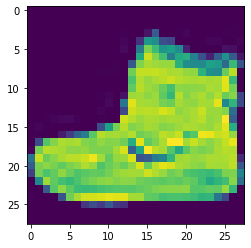

In [ ]:
import matplotlib.pyplot as plt

img, label = train_set[0]
print(labels[label])
plt.imshow(img[0])

Sandal


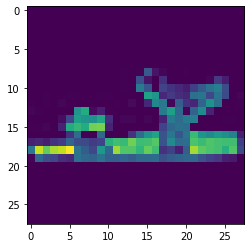

In [ ]:
img, label = train_set[-1]
print(labels[label])
plt.imshow(img[0])

## Wrapping dataset with `DataLoader`

In [ ]:
import numpy as np
from torch.utils.data import DataLoader

train_loader = DataLoader(train_set, shuffle=True)
test_loader = DataLoader(test_set, shuffle=True)

# Model architecture

A multilayer perceptron is a neural network consists of more than one [`nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#linear) layer.

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9weXRvcmNoLm9yZy9kb2NzL3N0YWJsZS9nZW5lcmF0ZWQvdG9yY2gubm4uTGluZWFyLmh0bWwjdG9yY2gubm4uTGluZWFy)

The following model consist of 3 layers of preceptron. Between them is a ReLU (Rectified Linear Unit) activation function.

```
             784 inputs          120 inputs          84 inputs
   input   +------------+ RelU +------------+ RelU +------------+ 10 outputs
---------->| preceptron |----->| preceptron |----->| preceptron |------------>
28x28=784  +------------+      +------------+      +------------+ of probabilities
             120 outputs         84 outputs          10 outpus

```

In [ ]:
import torch.nn as nn

model = nn.Sequential(
  nn.Flatten(),
  nn.Linear(28 * 28, 120),
  nn.ReLU(),
  nn.Linear(120, 84),
  nn.ReLU(),
  nn.Linear(84, 10)
)

# if NVIDIA GPU is available, we put the model in GPU.
if torch.cuda.is_available():
  model = model.cuda()

The model input is a 2d-array of the image pixel values. Pixel values of a particular image would first flatten into a 1d-array and go through the neural network. `nn.ReLU` is an activation function that we see it in next section.

Besides `nn.Linear` layer, there are many other network out there for example Convolution Layers for Convolution Neural Network (CNN), Recurrent Layers for Recurrent Neural Network and etc...

# [Activation functions](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)

Activation functions in deep learning is one of the key model architecture. It defines a output range for neuron in a neural network. Let's take a look to the following activation functions.

## `nn.Sigmoid`

Historically, Sigmoid is a common choice of activation function for Multilayer perceptron.

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9weXRvcmNoLm9yZy9kb2NzL3N0YWJsZS9nZW5lcmF0ZWQvdG9yY2gubm4uU2lnbW9pZC5odG1sI3RvcmNoLm5uLlNpZ21vaWQ=)

![](https://pytorch.org/docs/stable/_images/Sigmoid.png)

## `nn.Tanh`

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9weXRvcmNoLm9yZy9kb2NzL3N0YWJsZS9nZW5lcmF0ZWQvdG9yY2gubm4uVGFuaC5odG1sI3RvcmNoLm5uLlRhbmg=)

![](https://pytorch.org/docs/stable/_images/Tanh.png)

## `nn.ReLU`

In our model, `nn.ReLU` is used for `nn.Linear` layer. It is more common to use `nn.ReLU` nowadays because of [Vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem#mw-content-text).

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9weXRvcmNoLm9yZy9kb2NzL3N0YWJsZS9nZW5lcmF0ZWQvdG9yY2gubm4uUmVMVS5odG1sI3RvcmNoLm5uLlJlTFU=)

![](https://pytorch.org/docs/stable/_images/ReLU.png)


# [Loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions)


## `nn.L1Loss`

`nn.L1Loss` is the loss function for applying L1 regulatorization.

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9weXRvcmNoLm9yZy9kb2NzL3N0YWJsZS9nZW5lcmF0ZWQvdG9yY2gubm4uTDFMb3NzLmh0bWwjdG9yY2gubm4uTDFMb3Nz)

## `nn.MSELoss`

`nn.MSELoss` is the loss function for applying L2 regulatorization.

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9weXRvcmNoLm9yZy9kb2NzL3N0YWJsZS9nZW5lcmF0ZWQvdG9yY2gubm4uTVNFTG9zcy5odG1sI3RvcmNoLm5uLk1TRUxvc3M=)

## `nn.CrossEntropyLoss`


In our example, we would like to use [`nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) loss function. Let's take a look to it.

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9weXRvcmNoLm9yZy9kb2NzL3N0YWJsZS9nZW5lcmF0ZWQvdG9yY2gubm4uQ3Jvc3NFbnRyb3B5TG9zcy5odG1sI3RvcmNoLm5uLkNyb3NzRW50cm9weUxvc3M=)

In [ ]:
loss_function = nn.CrossEntropyLoss()

if torch.cuda.is_available():
  loss_function = loss_function.cuda()

# Optimizer

## Stochastic Gradient Descent (SGD)

We would like to use [Stochastic Gradient Descent (SGD)](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD) optimization in our model.

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9weXRvcmNoLm9yZy9kb2NzL3N0YWJsZS9nZW5lcmF0ZWQvdG9yY2gub3B0aW0uU0dELmh0bWwjdG9yY2gub3B0aW0uU0dE)

In [ ]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr=1e-3)

## Adam

Adam is a SGD with adaptive estimation.

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9weXRvcmNoLm9yZy9kb2NzL3N0YWJsZS9nZW5lcmF0ZWQvdG9yY2gub3B0aW0uQWRhbS5odG1sI3RvcmNoLm9wdGltLkFkYW0=)

# Traning and evaluation

## Training loop

In [ ]:
from tqdm import tqdm # for making progress bar

NUM_EPOCHS = 1 # each epoch take a few minutes using Colab CPU Standard runtime

for epoch in range(NUM_EPOCHS):
  loop = tqdm(train_loader, position=0, leave=True)

  model.train() # put model in training mode
  for (input, label) in loop:     # get each input and its corresponding label
    if torch.cuda.is_available(): # load into GPU if available
      input, label = input.cuda(), label.cuda()
    optimizer.zero_grad()         # set gradients to zero
    output = model.forward(input) # feed input into the model
    loss = loss_function(output, label) # compute the loss between input and target
    loss.backward()               # compute the gradients
    optimizer.step()              # update model parameters with optimizer

    loop.set_description(f"Epoch [{epoch}/{NUM_EPOCHS}]")

Epoch [0/1]: 100%|██████████| 60000/60000 [07:53<00:00, 126.59it/s]


## Model evaluation 

In [ ]:
correct = 0
total = 0

loop = tqdm(test_loader, position=0, leave=True)
model.eval() # put model in evaluation mode
for (input, label) in loop:
  if torch.cuda.is_available():
    input, label = input.cuda(), label.cuda()
  output = model.forward(input) # feed input into the model
  _, predicted = torch.max(output.data, 1) # make preduction
  total += label.size(0)        # increase total number
  correct += (predicted == label).sum().item() # increase correct number
  loop.set_postfix(acc=(100*correct/total)) # showing number in percentage

100%|██████████| 10000/10000 [00:57<00:00, 173.11it/s, acc=82.3]


# Regularization

Regularization techniques is for prevent overfiting. Let's take a look how we could apply it in Pytorch.

## L1 regularization

In face, we could implement L1 regulatorization by our own. Let's modify the training loop as follows.

In [ ]:
from tqdm import tqdm # for making progress bar

NUM_EPOCHS = 1 # each epoch take a few minutes using Colab CPU Standard runtime
l1_lambda = 1e-3

for epoch in range(NUM_EPOCHS):
  loop = tqdm(train_loader, position=0, leave=True)

  model.train() # put model in training mode
  for (input, label) in loop:
    if torch.cuda.is_available():
      input, label = input.cuda(), label.cuda()
    optimizer.zero_grad()
    output = model.forward(input)
    loss = loss_function(output, label)
    
    # sum the absolute value of all weights in the model
    l1_norm = sum(p.abs().sum() for p in model.parameters())
    loss += l1_lambda * l1_norm

    loss.backward()
    optimizer.step()

    loop.set_description(f"Epoch [{epoch}/{NUM_EPOCHS}]")

Epoch [0/1]: 100%|██████████| 60000/60000 [08:51<00:00, 112.95it/s]


### Evaluation

In [ ]:
correct = 0
total = 0

loop = tqdm(test_loader, position=0, leave=True)
model.eval() # put model in evaluation mode
for (input, label) in loop:
  if torch.cuda.is_available():
    input, label = input.cuda(), label.cuda()
  output = model.forward(input)
  _, predicted = torch.max(output.data, 1)
  total += label.size(0)
  correct += (predicted == label).sum().item()
  loop.set_postfix(acc=(100*correct/total))

100%|██████████| 10000/10000 [00:58<00:00, 171.08it/s, acc=81.5]


## L2 regularization

In `optim.SGD(...)` fucntion, there is a `weight_decay` parameter for L2 penalty value. Default is `0`, meaning that no L2 regularization. When we change it to a value larger then `0`, it would behave as L2 regularization.

In [ ]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr=1e-3, weight_decay=1e-3)

In [ ]:
from tqdm import tqdm # for making progress bar

NUM_EPOCHS = 1 # each epoch take a few minutes using Colab CPU Standard runtime
l1_lambda = 1e-3

for epoch in range(NUM_EPOCHS):
  loop = tqdm(train_loader, position=0, leave=True)

  model.train() # put model in training mode
  for (input, label) in loop:
    if torch.cuda.is_available():
      input, label = input.cuda(), label.cuda()
    optimizer.zero_grad()
    output = model.forward(input)
    loss = loss_function(output, label)
    loss.backward()
    optimizer.step()

    loop.set_description(f"Epoch [{epoch}/{NUM_EPOCHS}]")

Epoch [0/1]: 100%|██████████| 60000/60000 [07:41<00:00, 129.98it/s]


### Evaluation

You will see the accuracy is higher then before without regulatization.

In [ ]:
correct = 0
total = 0

loop = tqdm(test_loader, position=0, leave=True)
model.eval() # put model in evaluation mode
for (input, label) in loop:
  if torch.cuda.is_available():
    input, label = input.cuda(), label.cuda()
  output = model.forward(input)
  _, predicted = torch.max(output.data, 1)
  total += label.size(0)
  correct += (predicted == label).sum().item()
  loop.set_postfix(acc=(100*correct/total))

100%|██████████| 10000/10000 [00:52<00:00, 190.60it/s, acc=83.3]
